<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Credid-Card-Default-Prediction" data-toc-modified-id="Credid-Card-Default-Prediction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Credid Card Default Prediction</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#About-Dataset" data-toc-modified-id="About-Dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>About Dataset</a></span><ul class="toc-item"><li><span><a href="#Importing-important-libraries" data-toc-modified-id="Importing-important-libraries-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Importing important libraries</a></span></li><li><span><a href="#Loading-dataset" data-toc-modified-id="Loading-dataset-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Loading dataset</a></span></li></ul></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data cleaning</a></span></li></ul></li></ul></div>

# Credid Card Default Prediction

|Project               | Credit Card default prediction  |
|----------------------|---------------------------------|
|Domain                | Banking                         |
|Technologies          | Machine learning                |


##  Problem Statement
Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
The biggest threats faced by commercial banks is the risk prediction of credit clients.
The goal is to predict the probability of credit default based on credit card owner's
characteristics and payment history.


## About Dataset

Dataset Information

This dataset contains information on default payments, demographic factors, credit
data, history of payment, and bill statements of credit card clients in Taiwan from April
2005 to September 2005.

Content:

There is 25 Variable:

● ID: ID of each client

● LIMIT_BAL: Amount of given credit in NT dollars (includes individual and

family/supplementary credit

● SEX: Gender (1=male, 2=female)

● EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others,
5=unknown, 6=unknown)

● MARRIAGE: Marital status (1=married, 2=single, 3=others)

● AGE: Age in years

● PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for
one month, 2=payment delay for two months, … 8=payment delay for eight
months, 9=payment delay for nine months and above)
● PAY_2: Repayment status in August, 2005 (scale same as above)

● PAY_3: Repayment status in July, 2005 (scale same as above)

● PAY_4: Repayment status in June, 2005 (scale same as above)

● PAY_5: Repayment status in May, 2005 (scale same as above)

● PAY_6: Repayment status in April, 2005 (scale same as above)

● BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

● BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

● BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

● BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

● BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

●BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

● PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

● PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)


● PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

● PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

● PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

● PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

● default.payment.next.month: Default payment (1=yes, 0=no)


###  Importing important libraries

In [1]:
!pip install klib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
import warnings
import sweetviz as sv


%matplotlib inline
warnings.filterwarnings('ignore')
# plt.style.use('dark_background')
sns.set_style('darkgrid')
pd.set_option('display.max_columns',None)
plt.rcParams['figure.dpi'] = 140;

### Loading dataset

In [2]:
df  = pd.read_csv('credit.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## Data cleaning

Steps involved in data cleaning
1. Cleaning column names 

2. Check for missing values

3. Check for duplicates

4. Check for outliers




In [6]:
new_col_names = {
    'limit_bal':'credit_limit',
    'pay_0':'re_sep', 
    'pay_2':'re_aug', 
    'pay_3':'re_jul', 
    'pay_4':'re_jun', 
    'pay_5':'re_may', 
    'pay_6':'re_apr',
    'pay_amt1':'pre_sep',
    'pay_amt2':'pre_aug',
    'pay_amt3':'pre_jul',
    'pay_amt4':'pre_jun',
    'pay_amt5':'pre_may',
    'pay_amt6':'pre_apr',
    'bill_amt1':'bill_sep', 
    'bill_amt2':'bill_aug', 
    'bill_amt3':'bill_jul', 
    'bill_amt4':'bill_jun', 
    'bill_amt5':'bill_may',
    'bill_amt6':'bill_apr',
    'default_payment_next_month':'current_default'
}

df = df.rename(columns=new_col_names)


In [7]:
klib.clean_column_names(df)

,id,credit_limit,sex,education,marriage,age,re_sep,re_aug,re_jul,re_jun,re_may,re_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,pre_sep,pre_aug,pre_jul,pre_jun,pre_may,pre_apr,current_default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### Check for missing values

In [8]:
df.isnull().sum()

id                 0
credit_limit       0
sex                0
education          0
marriage           0
age                0
re_sep             0
re_aug             0
re_jul             0
re_jun             0
re_may             0
re_apr             0
bill_sep           0
bill_aug           0
bill_jul           0
bill_jun           0
bill_may           0
bill_apr           0
pre_sep            0
pre_aug            0
pre_jul            0
pre_jun            0
pre_may            0
pre_apr            0
current_default    0
dtype: int64

<AxesSubplot:>

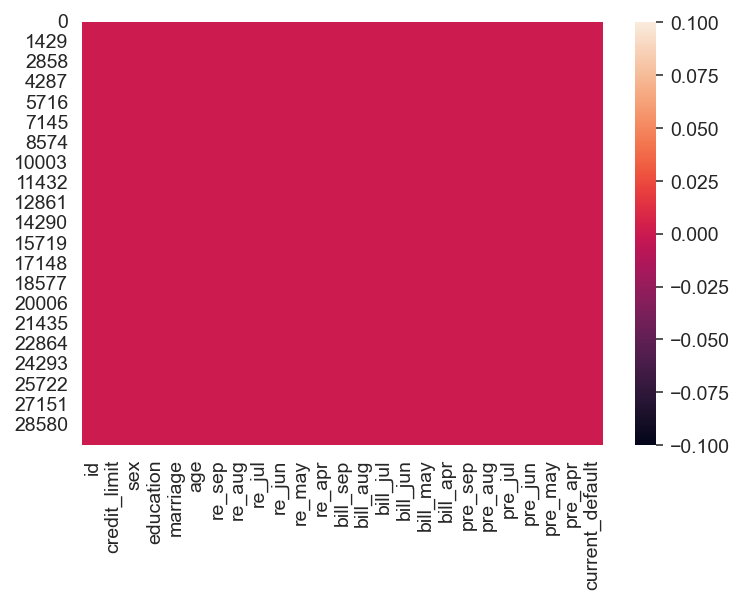

In [9]:
sns.heatmap(df.isnull())


As there is no missing values so no need of imputations

### Check for duplicates

In [8]:
df.duplicated().sum()

0

No duplicates found so no need to treat duplicates

### Dropping irrelevant columns

In [9]:
df.drop(columns= 'id', inplace = True)

### Check for outliers

<Figure size 2520x840 with 0 Axes>

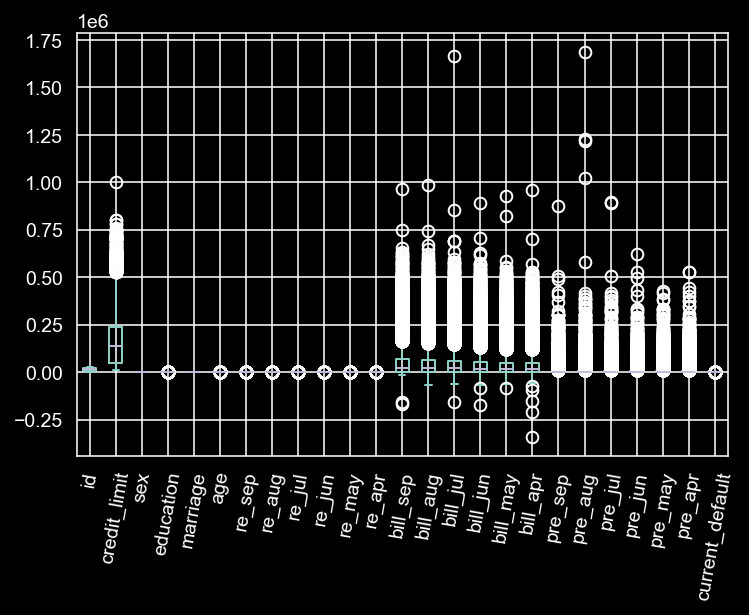

In [10]:
plt.figure(figsize=(18,6))
plt.style.use('dark_background')
df.plot(kind = 'box')
plt.xticks(rotation = 80)
plt.show()


## EDA

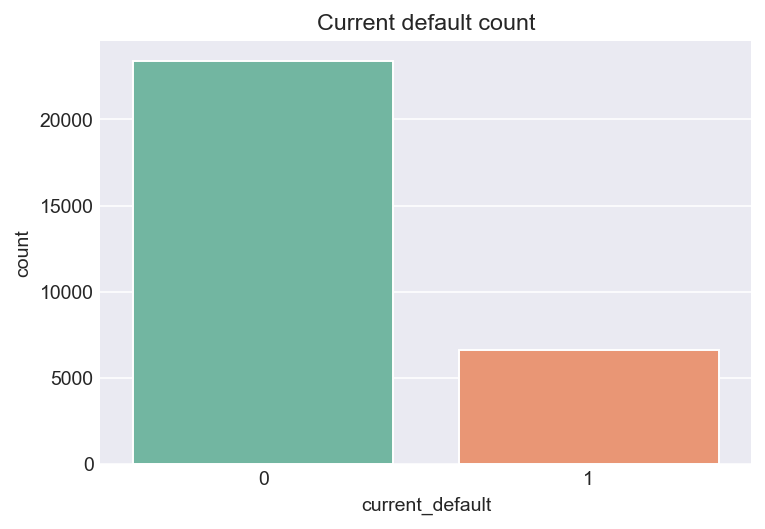

In [11]:
plt.style.use('seaborn-darkgrid')
sns.countplot(df.current_default,palette='Set2')
plt.title('Current default count');

In [12]:
df.keys()

Index(['id', 'credit_limit', 'sex', 'education', 'marriage', 'age', 're_sep',
       're_aug', 're_jul', 're_jun', 're_may', 're_apr', 'bill_sep',
       'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr', 'pre_sep',
       'pre_aug', 'pre_jul', 'pre_jun', 'pre_may', 'pre_apr',
       'current_default'],
      dtype='object')

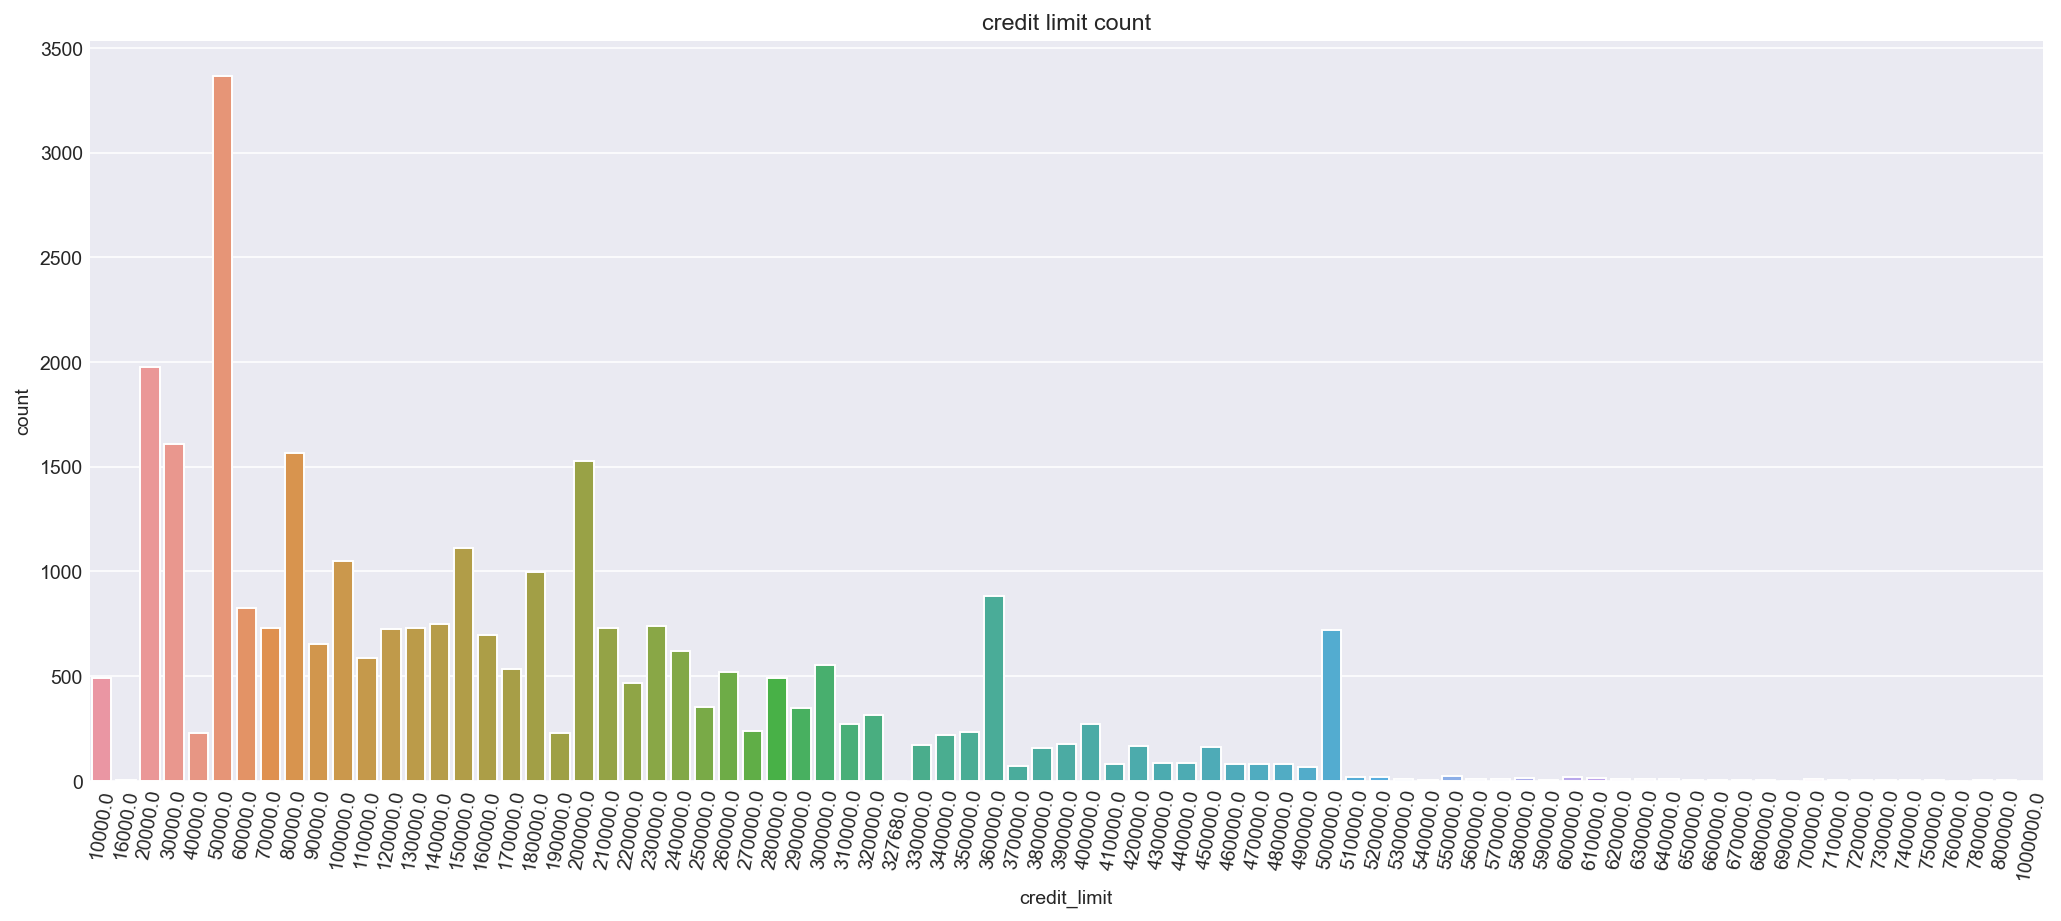

In [13]:
plt.figure(figsize=(18,7))
sns.countplot(df.credit_limit)
plt.xticks(rotation = 80)
plt.title('credit limit count')
plt.show()


In [14]:
df.credit_limit.mean()

167484.32266666667

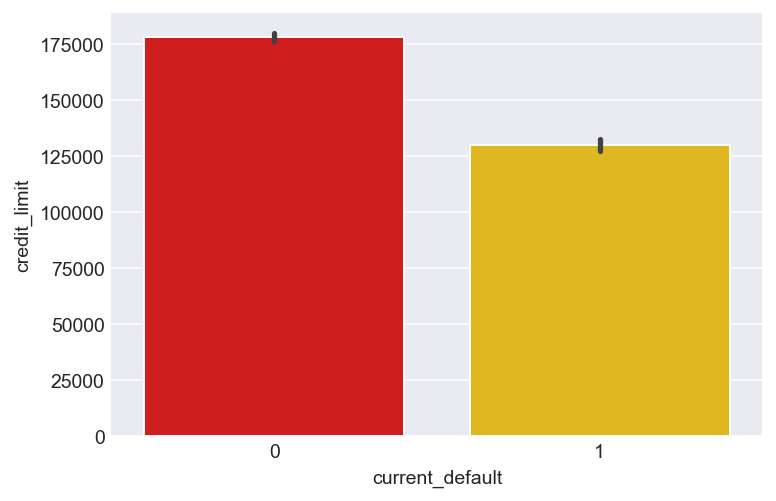

In [15]:
sns.barplot(x= 'current_default', y = 'credit_limit', data = df,palette='hot');

In [16]:
categorical_features = ['sex', 'education', 'marriage']

In [17]:
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['current_default']

In [18]:
df_cat.replace({'sex': {1 : 'male', 2 : 'female'}, 'education' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'marriage' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<Figure size 1400x700 with 0 Axes>

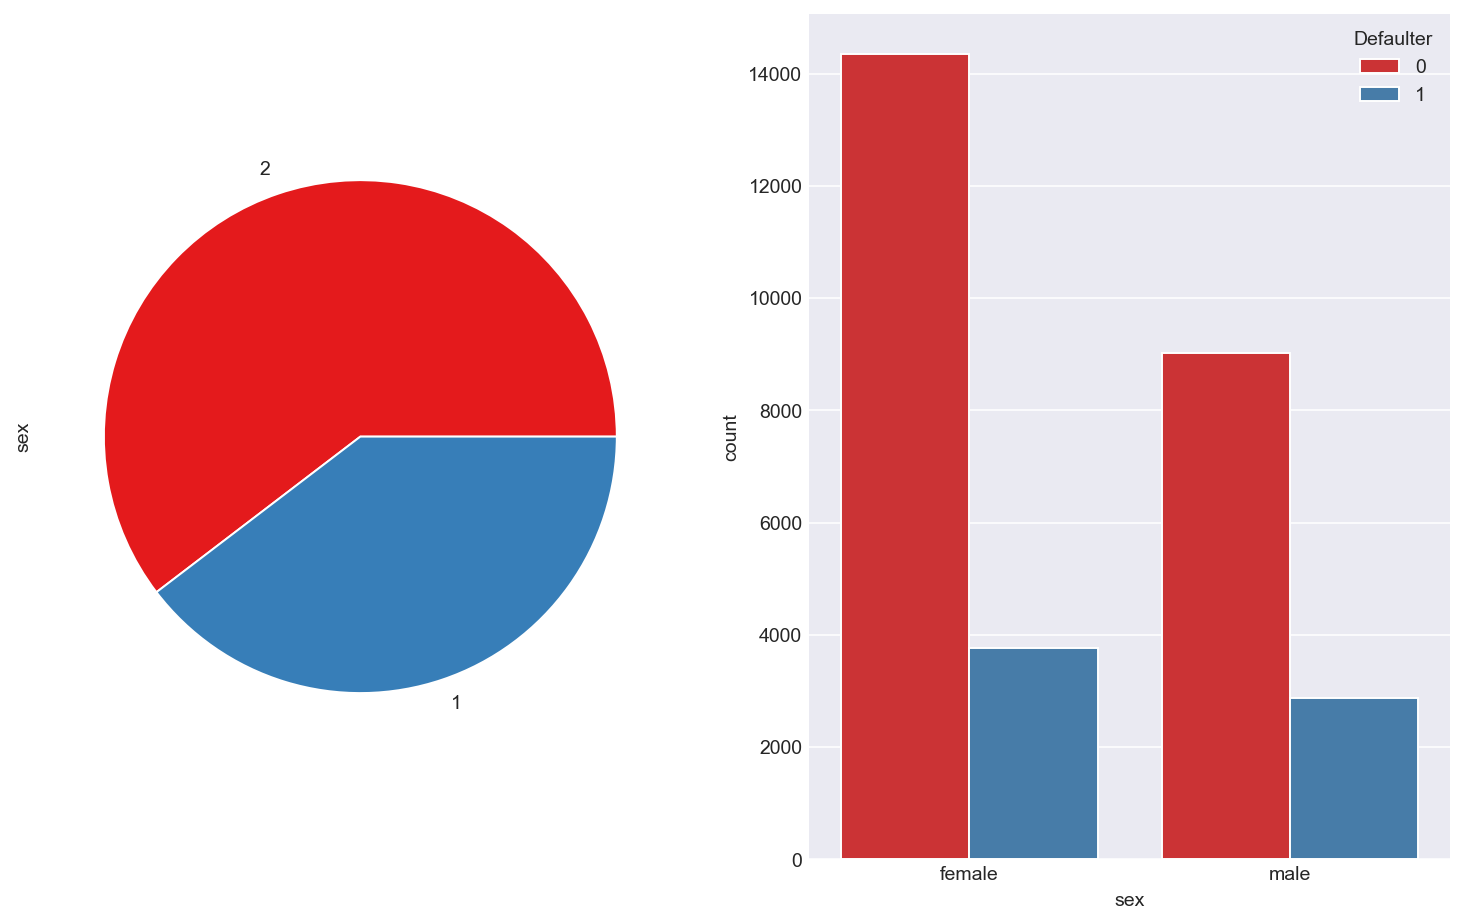

<Figure size 1400x700 with 0 Axes>

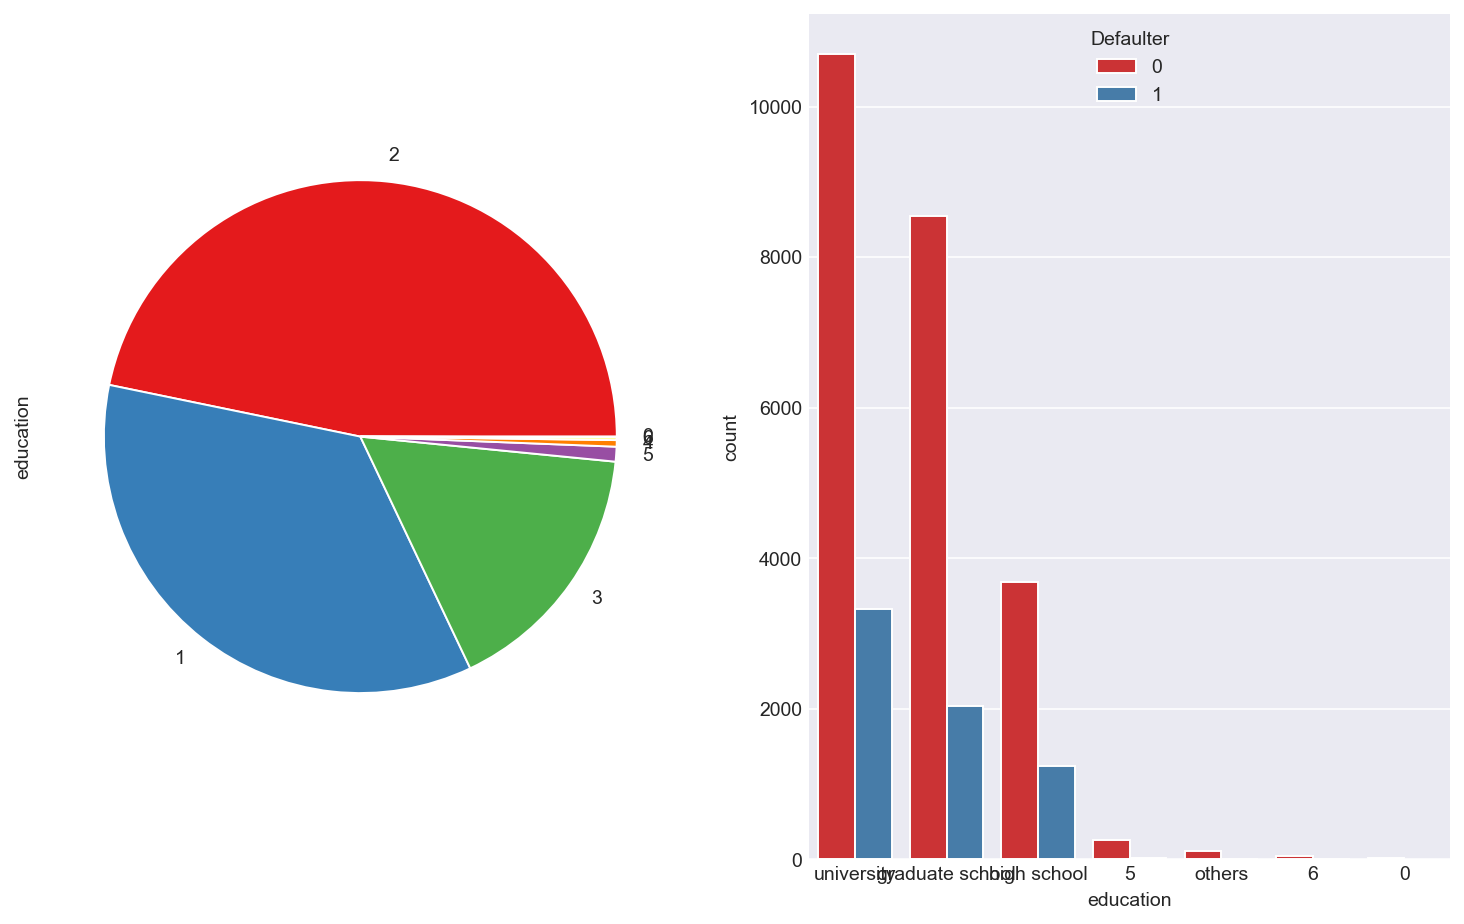

<Figure size 1400x700 with 0 Axes>

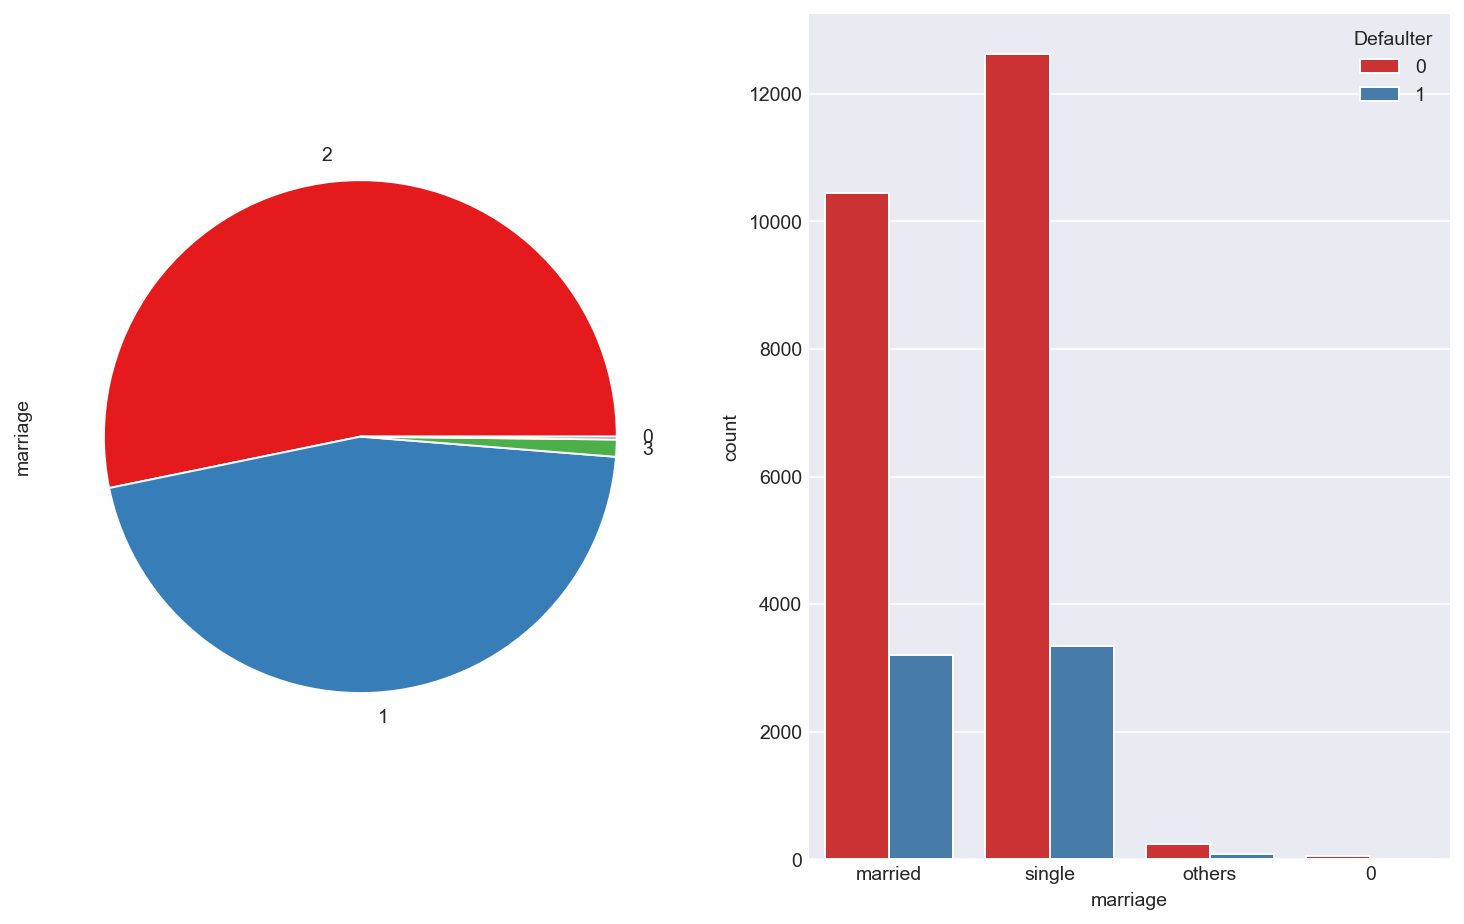

In [19]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  sns.set_palette('Set1')
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)
  plt.show()

Below are few observations for categorical features:




*   There are more females credit card holder,so no. of defaulter have high proportion of females.
*   No. of defaulters have a higher proportion of educated people  (graduate school and university)
*  No. of defaulters have a higher proportion of Singles.


### Age

<AxesSubplot:xlabel='age', ylabel='current_default'>

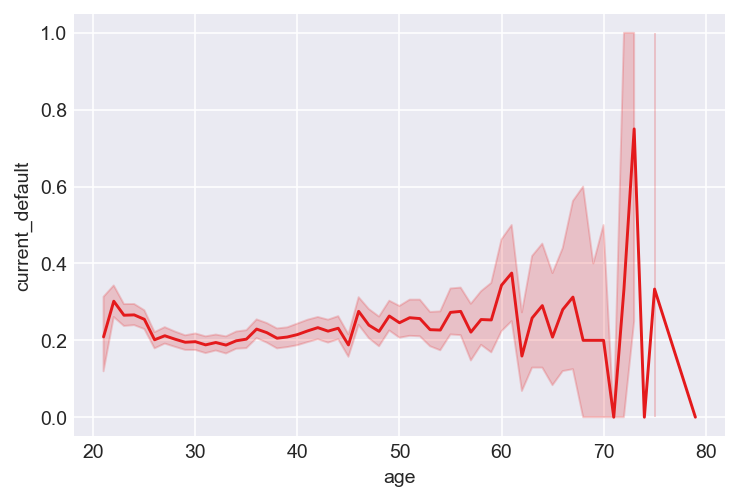

In [20]:
sns.lineplot(x = df.age, y= df.current_default,palette= 'bone')

<AxesSubplot:xlabel='age', ylabel='count'>

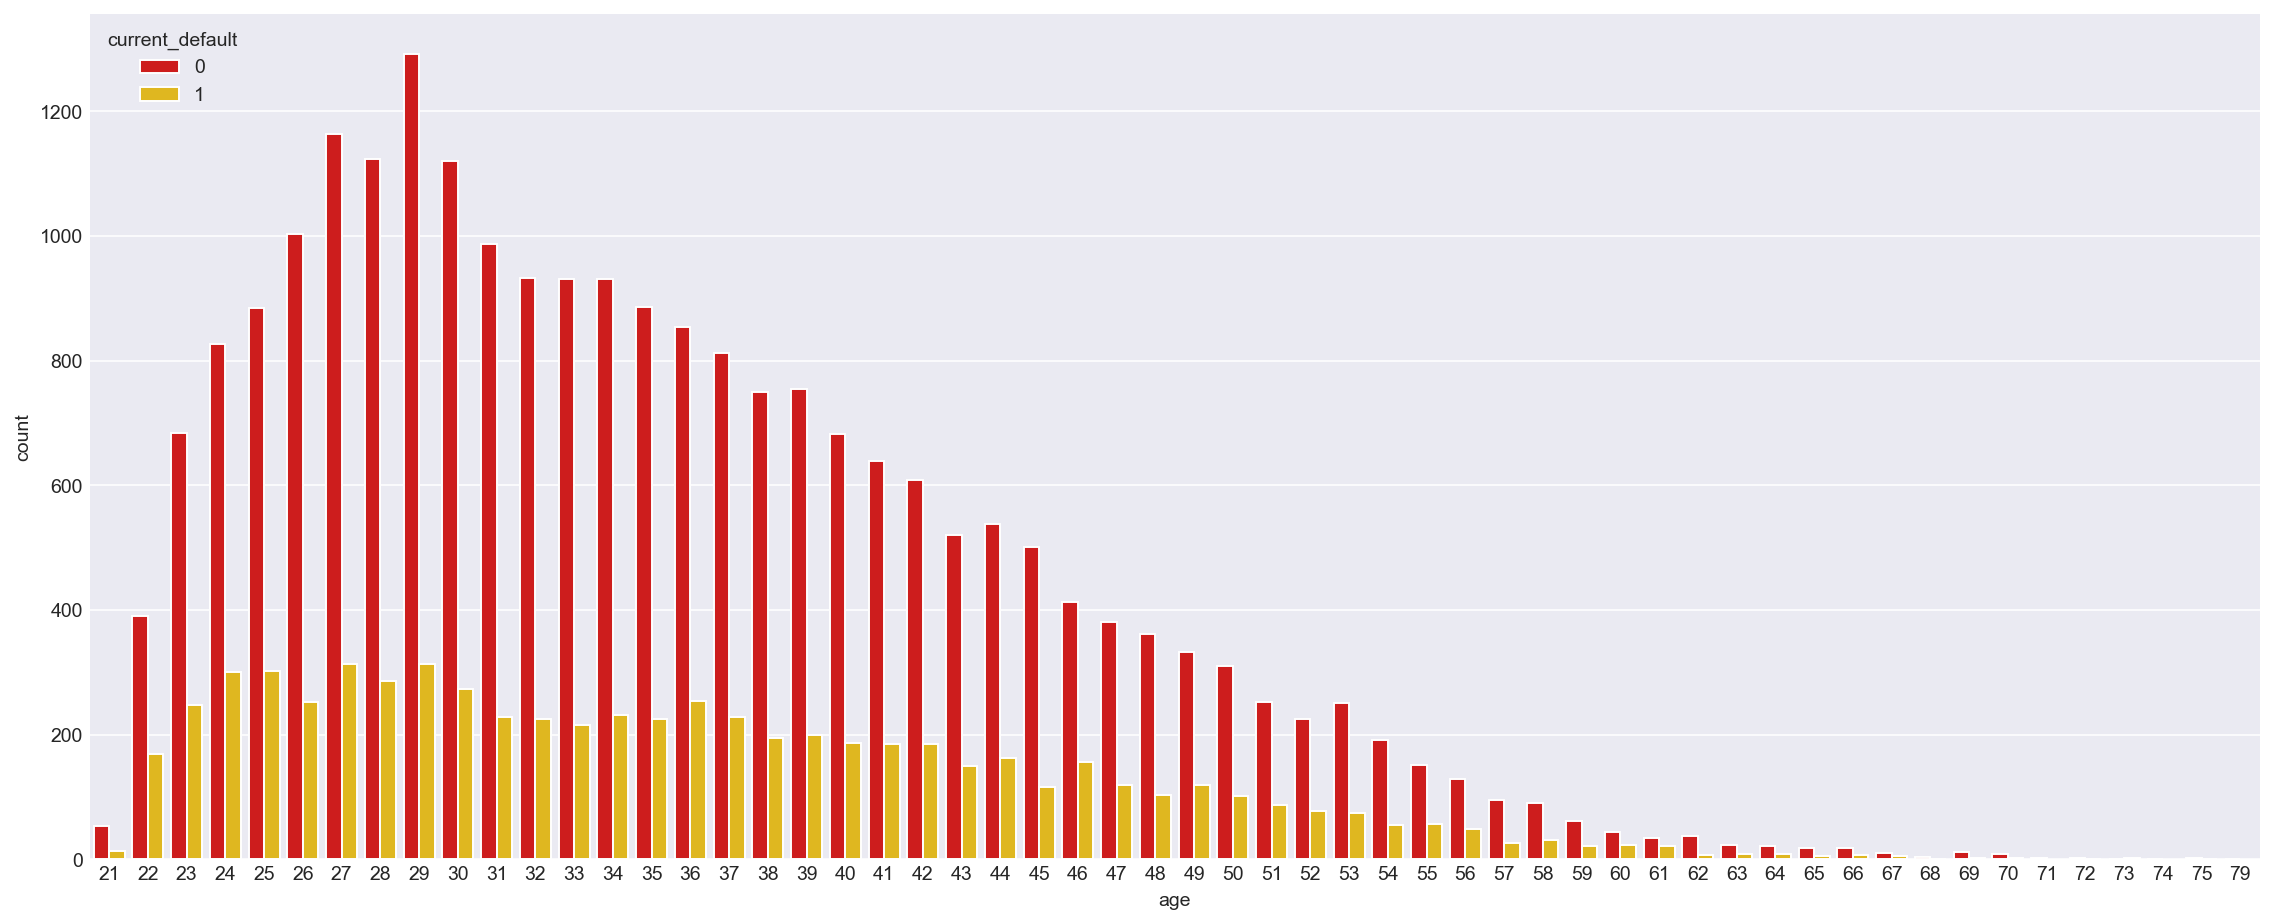

In [21]:
plt.figure(figsize=(20,8))
sns.countplot(x= 'age',hue='current_default',data =df,palette='hot')


most of the customers are from young age so defaulters will me more from young age.


In [22]:
df.columns

Index(['id', 'credit_limit', 'sex', 'education', 'marriage', 'age', 're_sep',
       're_aug', 're_jul', 're_jun', 're_may', 're_apr', 'bill_sep',
       'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr', 'pre_sep',
       'pre_aug', 'pre_jul', 'pre_jun', 'pre_may', 'pre_apr',
       'current_default'],
      dtype='object')

(-1=pay duly, 1=payment delay for
one month, 2=payment delay for two months,

 … 8=payment delay for eight
months, 9=payment delay for nine months and above)

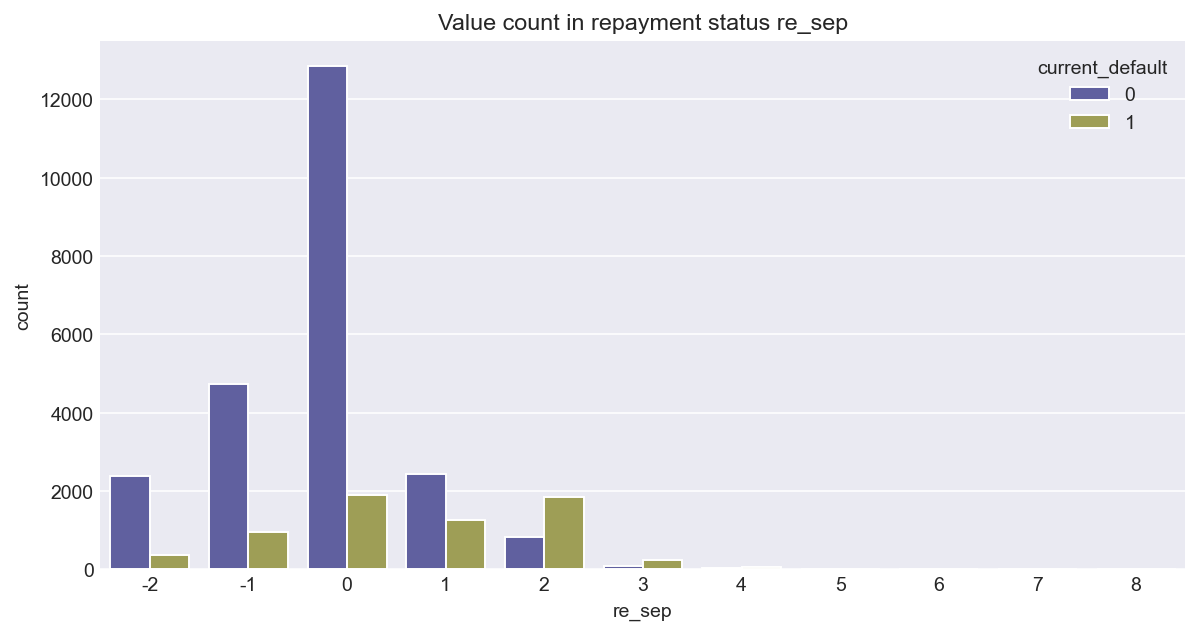

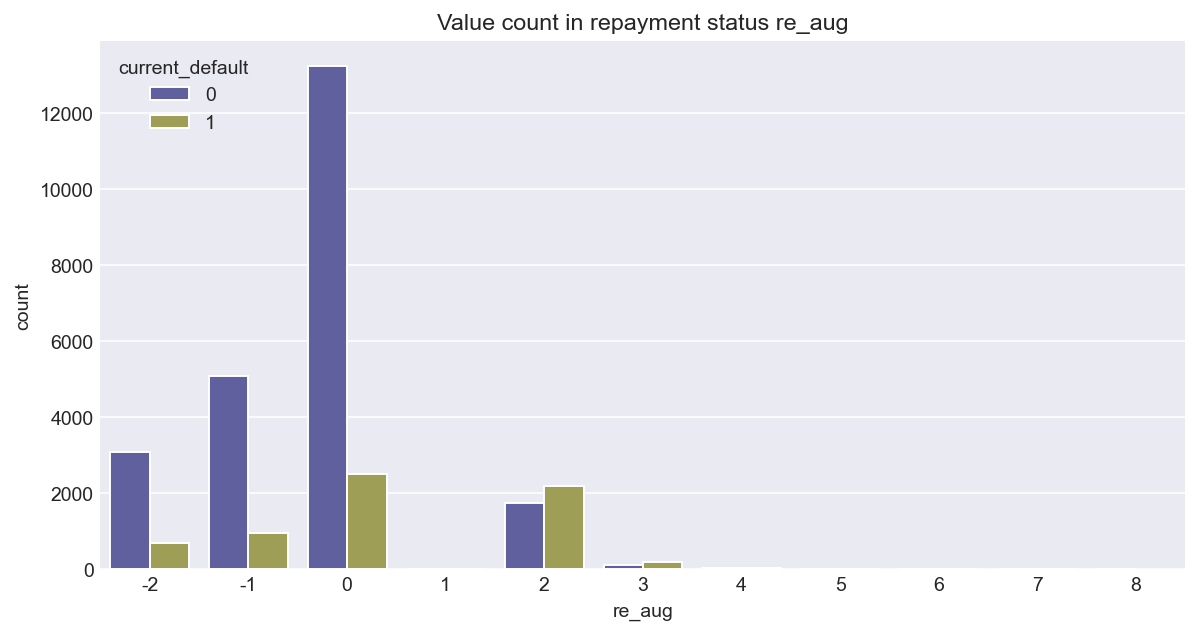

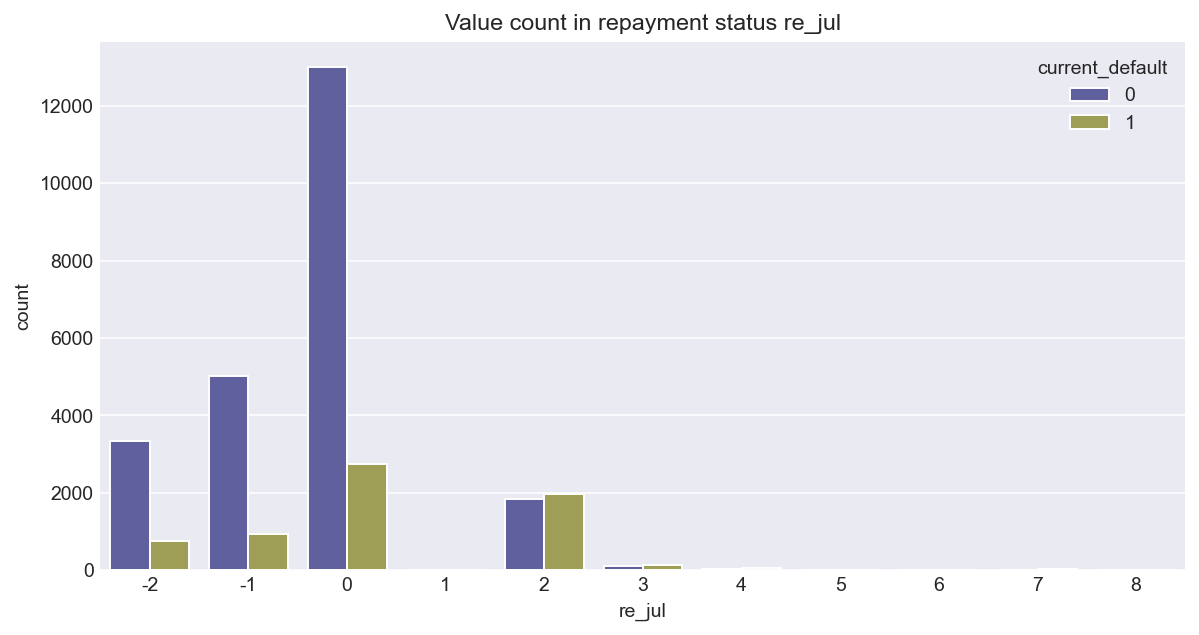

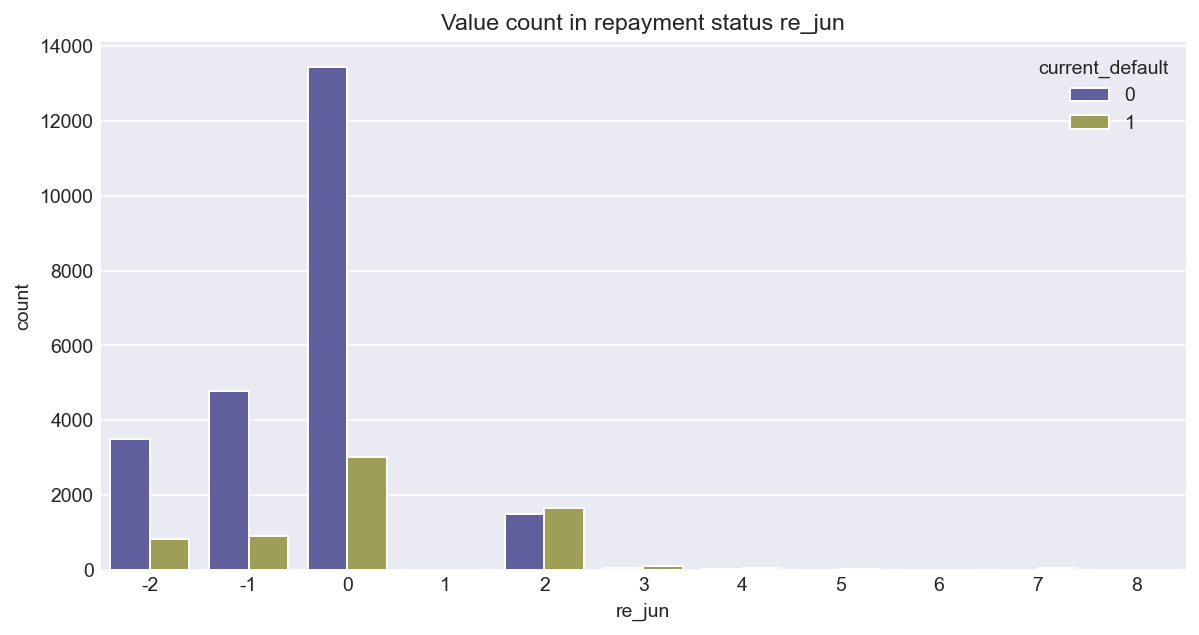

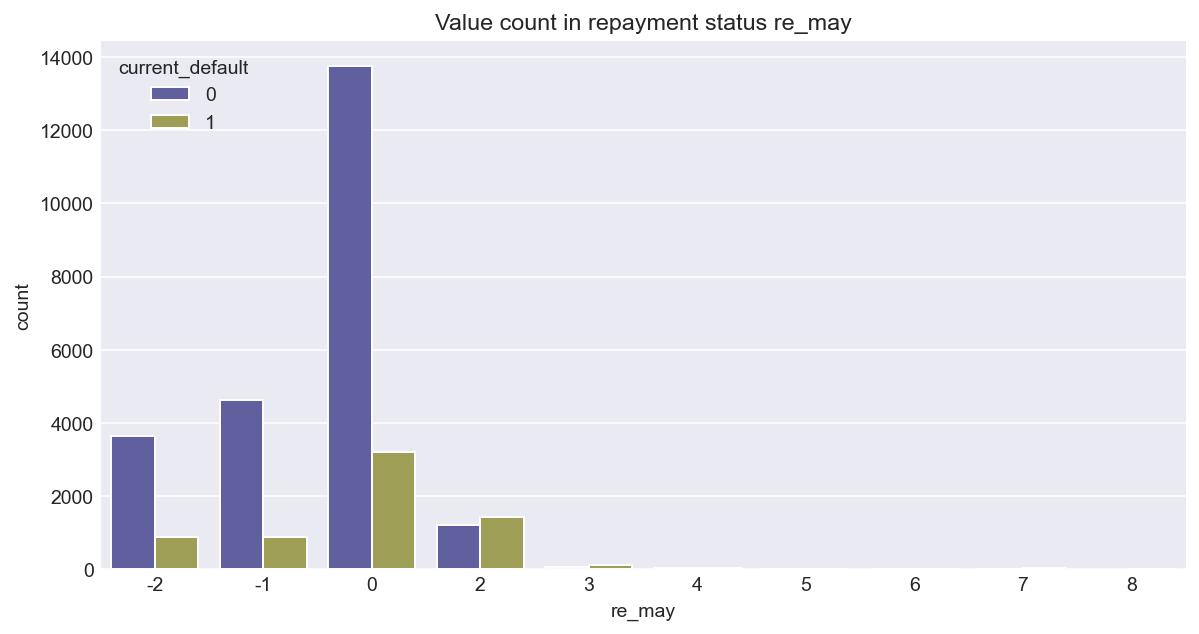

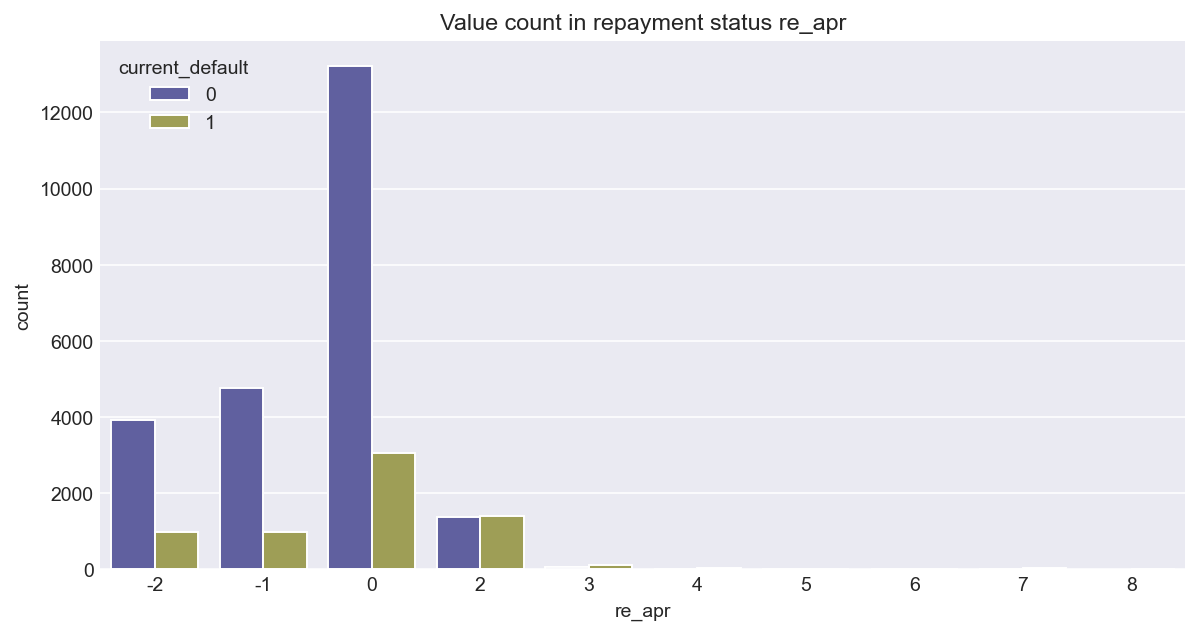

In [23]:

pay_col = ['re_sep','re_aug', 're_jul', 're_jun', 're_may', 're_apr']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col,hue = 'current_default', data = df,palette='gist_stern')
  plt.title("Value count in repayment status {}".format(col))

From above we can understand that most of the customers have paid their bills

In [24]:
df.columns

Index(['id', 'credit_limit', 'sex', 'education', 'marriage', 'age', 're_sep',
       're_aug', 're_jul', 're_jun', 're_may', 're_apr', 'bill_sep',
       'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr', 'pre_sep',
       'pre_aug', 'pre_jul', 'pre_jun', 'pre_may', 'pre_apr',
       'current_default'],
      dtype='object')

In [25]:
bls = ['bill_sep','bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr']

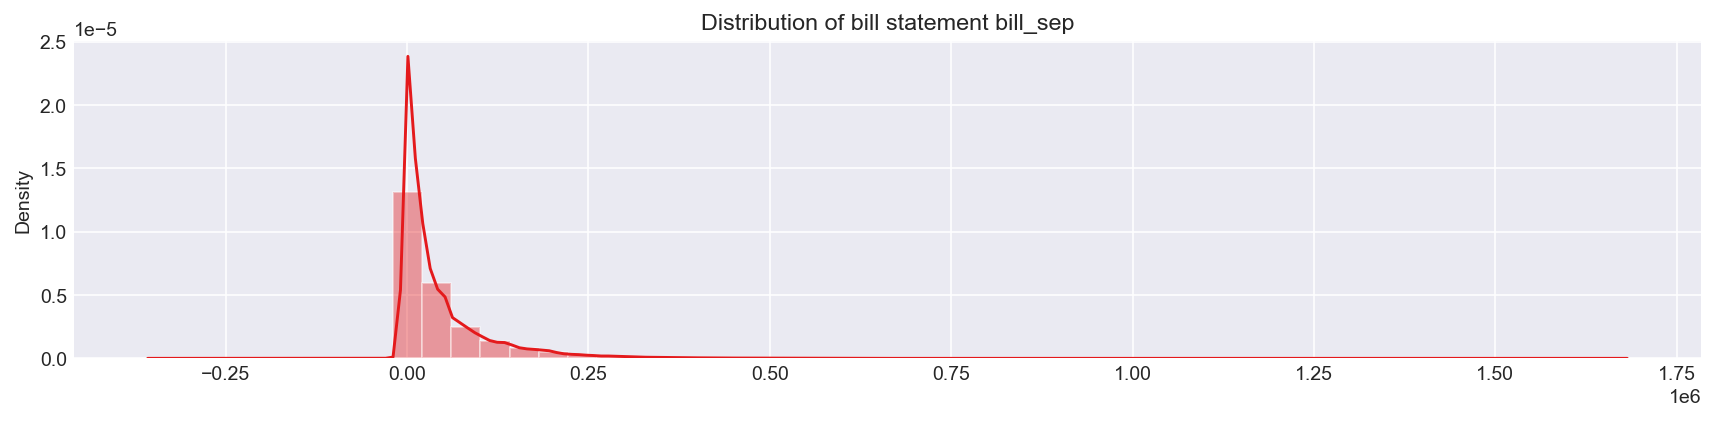

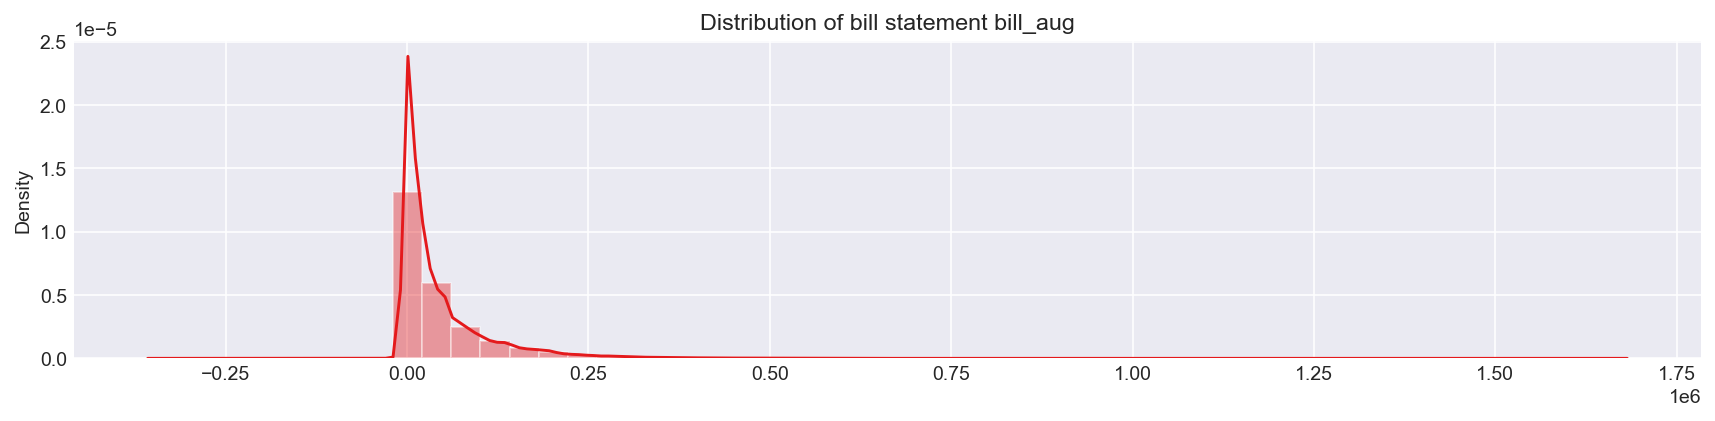

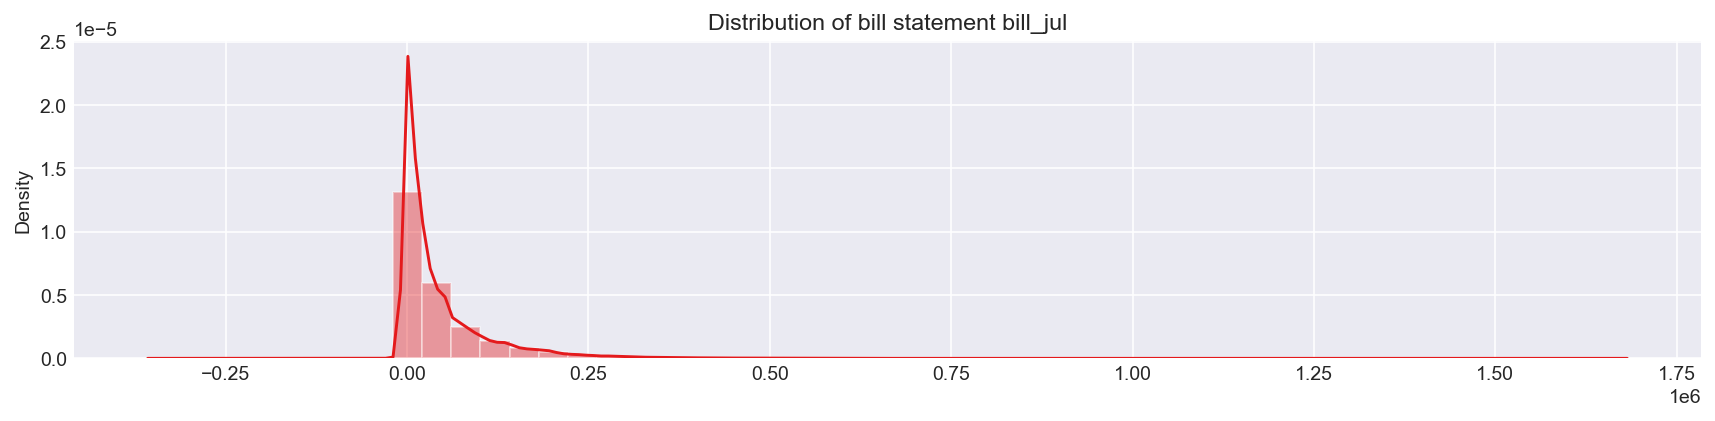

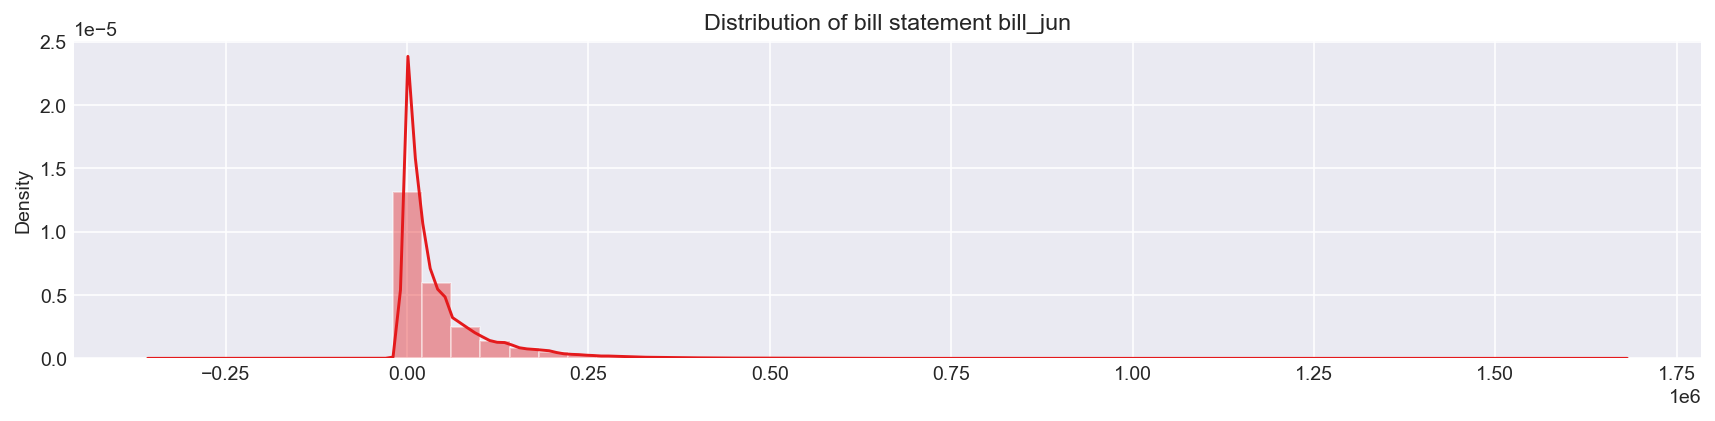

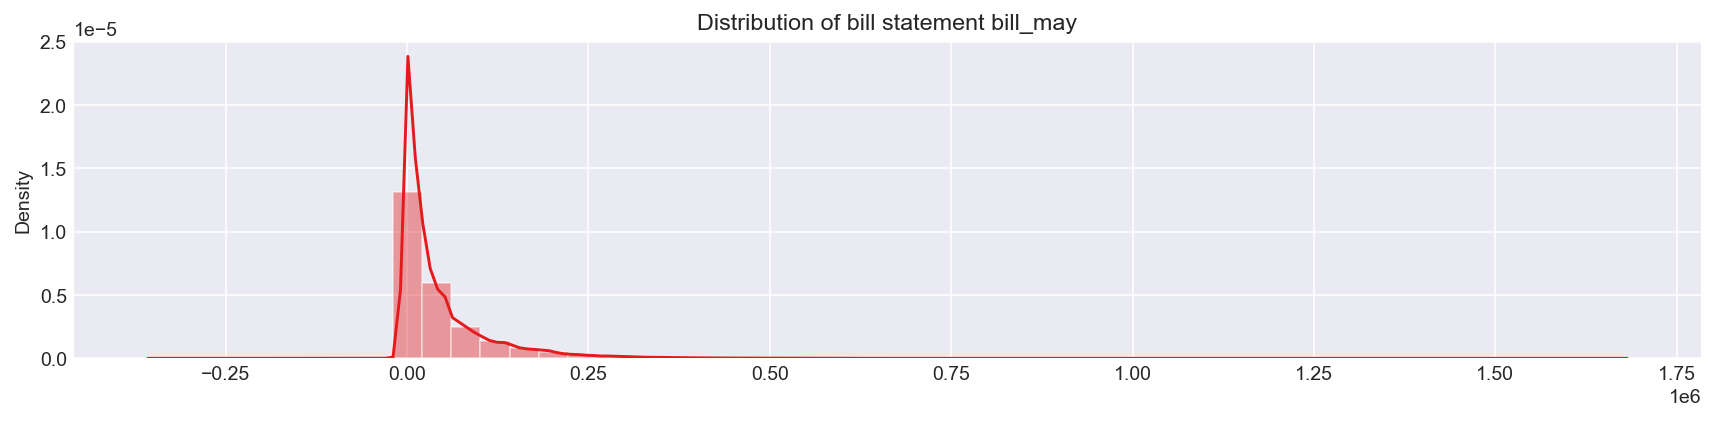

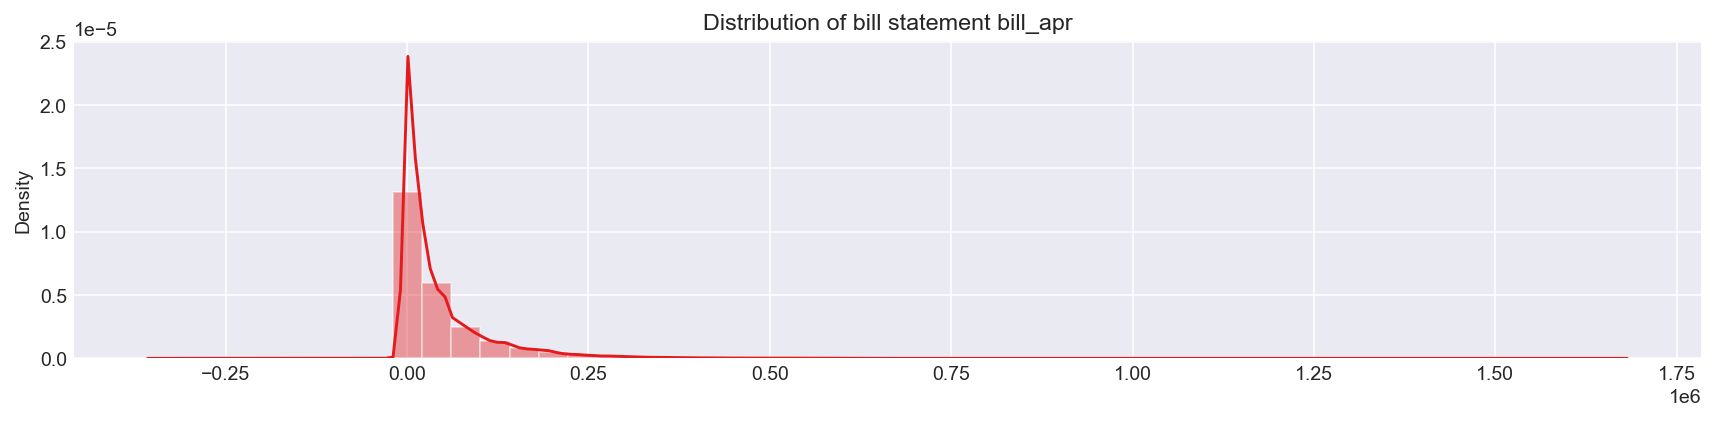

In [26]:
for col in bls:
    plt.figure(figsize=(15,3))
    sns.distplot(x=df[bls])
    plt.title('Distribution of bill statement {}'.format(col))

## Fetaure Engnineering

In [27]:
df.head()

,id,credit_limit,sex,education,marriage,age,re_sep,re_aug,re_jul,re_jun,re_may,re_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,pre_sep,pre_aug,pre_jul,pre_jun,pre_may,pre_apr,current_default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [28]:
features = df.iloc[:, 1:24]
target = df['current_default']

In [29]:
features.education = features.education.replace({6:5, 0:4})

# Marriage 
features.marriage = features.marriage.replace({0:3})

In [30]:
for column in features.columns.to_list()[5:11]:
    features[column] = features[column].replace({0:-1, -2:-1})

In [31]:
features.head(10)

,credit_limit,sex,education,marriage,age,re_sep,re_aug,re_jul,re_jun,re_may,re_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,pre_sep,pre_aug,pre_jul,pre_jun,pre_may,pre_apr
0,20000.0,2,2,1,24,2,2,-1,-1,-1,-1,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,-1,-1,-1,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,-1,-1,-1,-1,-1,-1,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,-1,-1,-1,-1,-1,-1,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,-1,-1,-1,-1,-1,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
5,50000.0,1,1,2,37,-1,-1,-1,-1,-1,-1,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
6,500000.0,1,1,2,29,-1,-1,-1,-1,-1,-1,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0
7,100000.0,2,2,2,23,-1,-1,-1,-1,-1,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0
8,140000.0,2,3,1,28,-1,-1,2,-1,-1,-1,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0
9,20000.0,1,3,2,35,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0


In [32]:
features['default'] = target

In [33]:
features.head()


,credit_limit,sex,education,marriage,age,re_sep,re_aug,re_jul,re_jun,re_may,re_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,pre_sep,pre_aug,pre_jul,pre_jun,pre_may,pre_apr,default
0,20000.0,2,2,1,24,2,2,-1,-1,-1,-1,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,-1,-1,-1,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,-1,-1,-1,-1,-1,-1,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,-1,-1,-1,-1,-1,-1,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,-1,-1,-1,-1,-1,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [34]:
features.to_csv('cred_data_preprocessed.csv', index=False)

In [35]:
df = pd.read_csv('cred_data_preprocessed.csv')
features = df.iloc[:,:23]
target = df['default']

features.shape, target.shape

((30000, 23), (30000,))

## Machine learning

As this dataset is imbalanced dataset. to balance data we will use SMOTE random sampling technique

In [36]:
!pip install imbalanced-learn

In [37]:
from imblearn.combine import SMOTETomek

In [38]:
# Random sampling
smt = SMOTETomek(sampling_strategy='all')
sampled_features, sampled_target = smt.fit_resample(features, target)

sampled_features.shape, sampled_target.shape

((45464, 23), (45464,))

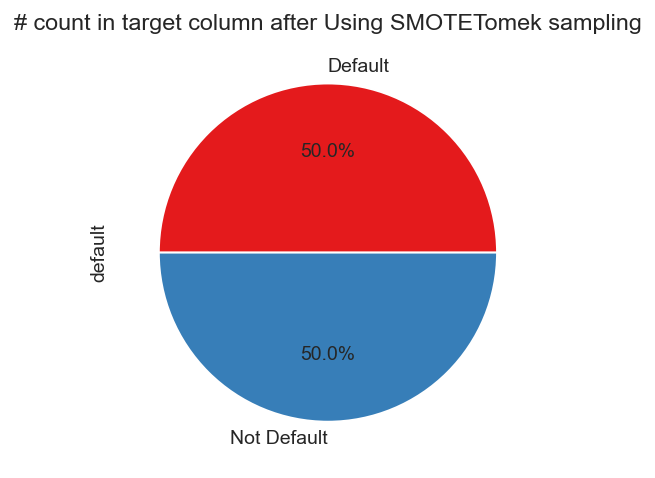

In [39]:
sampled_target.value_counts().plot(kind='pie', autopct = '%1.1f%%',labels=['Default', 'Not Default'])
plt.title("# count in target column after Using SMOTETomek sampling")


plt.show()

### Split dataset

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(sampled_features,sampled_target,test_size=0.2, random_state= 25 , shuffle= True)

In [42]:
X_test.shape,X_train.shape,
y_test.shape,y_train.shape


((9093,), (36371,))

### Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train,y_train)
clf.predict(X_test)
clf.predict_proba(X_test)

array([[0.56250323, 0.43749677],
       [0.12286684, 0.87713316],
       [0.75668841, 0.24331159],
       ...,
       [0.32672031, 0.67327969],
       [0.00988049, 0.99011951],
       [0.68075382, 0.31924618]])

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
from sklearn.metrics import RocCurveDisplay, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix
print("Train score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test Score: {:.3f}".format(clf.score(X_test, y_test)))
print(" ")

Train score: 0.762
Test Score: 0.763
 


In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train)

dt_predict = dt.predict(X_test)

# score
print("Train score: {:.3f}".format(dt.score(X_train, y_train)))
print("Test Score: {:.3f}".format(dt.score(X_test, y_test)))
print(" ")
print("Accuracy Score: {:.3f}".format(accuracy_score(y_test, dt_predict)))
print("F1 score: {:.3f}".format(f1_score(y_test, dt_predict)))
print(" ")
print("Precision Score: {:.3f}".format(precision_score(y_test, dt_predict)))
print("Recall Score: {:.3f}".format(recall_score(y_test, dt_predict)))

Train score: 0.999
Test Score: 0.789
 
Accuracy Score: 0.789
F1 score: 0.792
 
Precision Score: 0.780
Recall Score: 0.805


The model is overfitting here

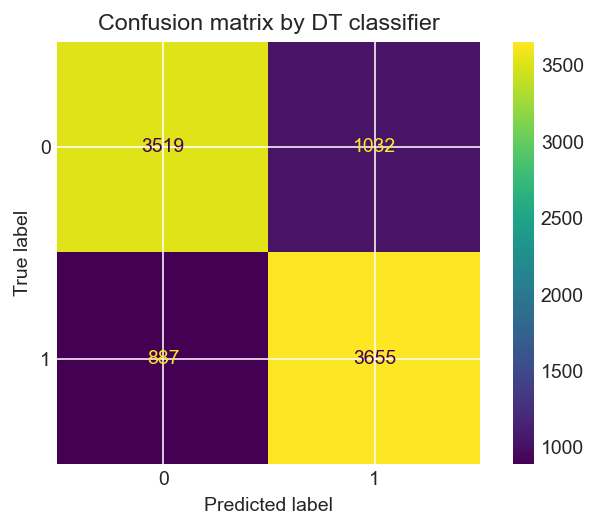

In [50]:
plot_confusion_matrix(dt, X_test, y_test)
plt.title("Confusion matrix by DT classifier");

Text(0.5, 1.0, 'Fetaure importance by DT classifier')

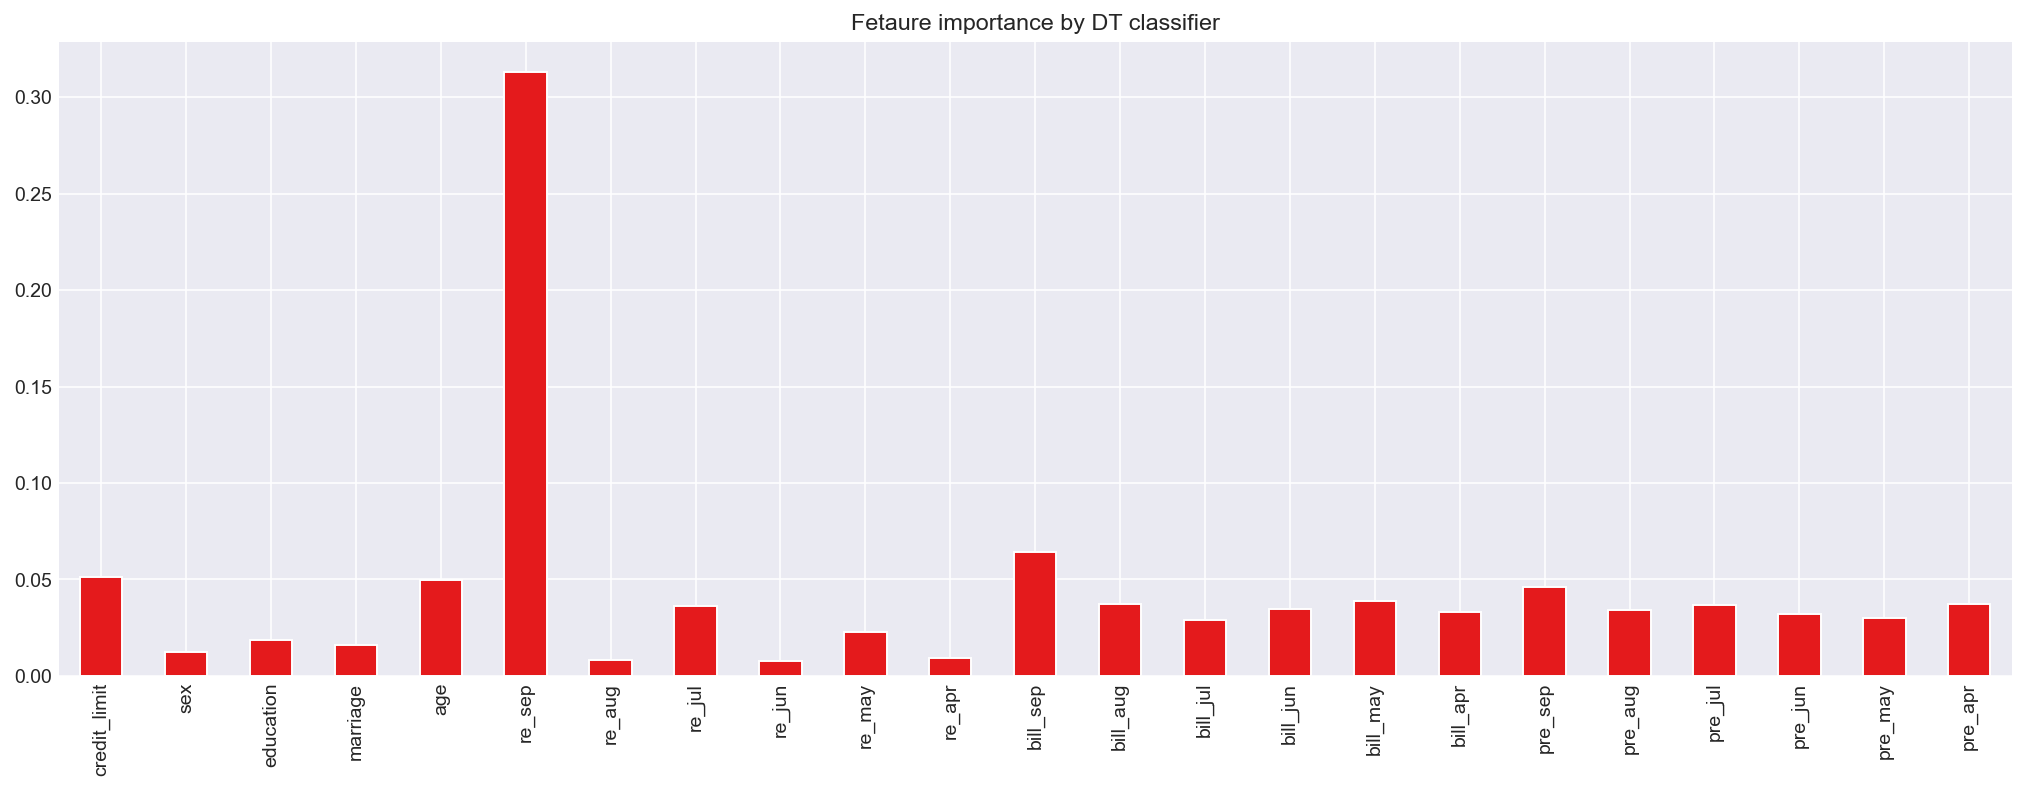

In [51]:
importance = pd.Series(dt.feature_importances_, index= features.columns)
importance.plot(kind='bar',figsize= (18,6))
plt.title("Fetaure importance by DT classifier")





Here repayment status in september Has highest importance coefficient

In [52]:
model_dt_prediction = pd.DataFrame({
    'actual': y_test,
    'predicted': dt_predict
})

model_dt_prediction.head()

,actual,predicted
31491,1,1
17424,1,0
1144,0,0
10050,0,0
6151,1,1


In [53]:
actual_ = model_dt_prediction.actual.value_counts()
actual_

0    4551
1    4542
Name: actual, dtype: int64

In [54]:
predicted_ = model_dt_prediction.predicted.value_counts()
predicted_

1    4687
0    4406
Name: predicted, dtype: int64

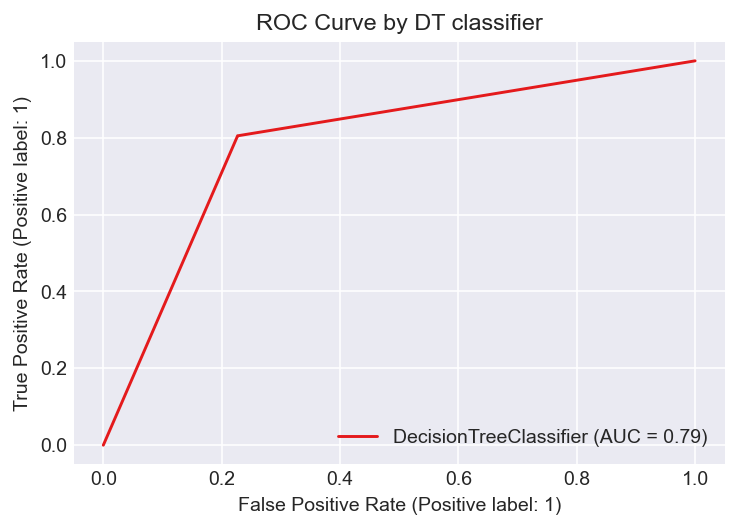

In [56]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt, X_test, y_test)
plt.title("ROC Curve by DT classifier");

### Random forest classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier(random_state= 50).fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [62]:
# Scores
# score
print("RF Train score: {:.3f}".format(rf.score(X_train, y_train)))
print("RF Test Score: {:.3f}".format(rf.score(X_test, y_test)))
print(" ")
print("RF Accuracy Score: {:.3f}".format(accuracy_score(y_test, rf_pred)))
print("RF F1 score: {:.3f}".format(f1_score(y_test, rf_pred)))
print(" ")
print("RF Precision Score: {:.3f}".format(precision_score(y_test, rf_pred)))
print("RF Recall Score: {:.3f}".format(recall_score(y_test, rf_pred)))
print("AUROC: {:.3f}".format(roc_auc_score(y_test, rf_pred)))

RF Train score: 0.999
RF Test Score: 0.866
 
RF Accuracy Score: 0.866
RF F1 score: 0.861
 
RF Precision Score: 0.895
RF Recall Score: 0.829
AUROC: 0.866


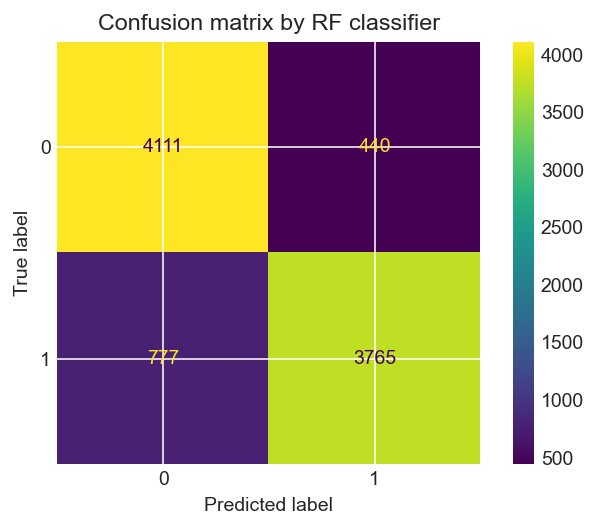

In [63]:
plot_confusion_matrix(rf, X_test, y_test)
plt.title("Confusion matrix by RF classifier");

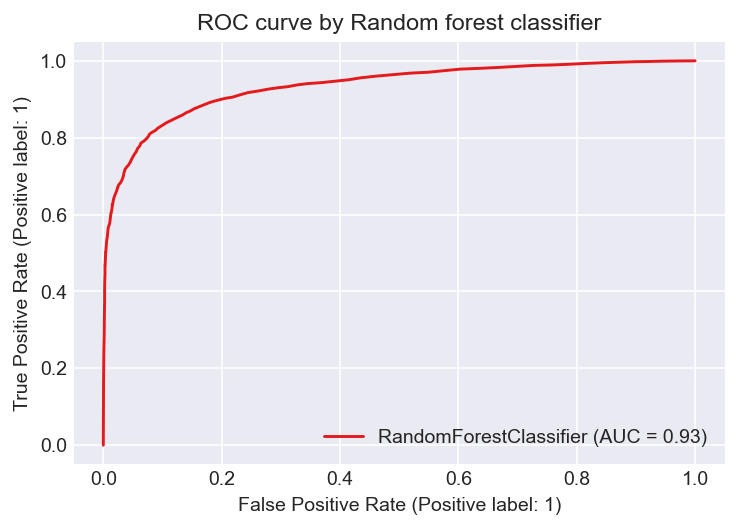

In [64]:
plot_roc_curve(rf, X_test, y_test)
plt.title("ROC curve by Random forest classifier");

In [66]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth' : [10,50,80],
    'n_estimators':[70,95],
    'random_state':[1,27,47],
    'max_features':[2,3]
}

grid_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, scoring='roc_auc')
rf_search = grid_rf.fit(sampled_features, sampled_target)

print("Best parameter: ", rf_search.best_params_)
print("Best score: ", rf_search.best_score_)

Best parameter:  {'max_depth': 50, 'max_features': 2, 'n_estimators': 95, 'random_state': 47}
Best score:  0.9219711947189912


### Fianl model

In [67]:
rf = RandomForestClassifier(random_state=47, max_depth=50, n_estimators=95, max_features=2).fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [68]:
# score
print("RF Train score: {:.3f}".format(rf.score(X_train, y_train)))
print("RF Test Score: {:.3f}".format(rf.score(X_test, y_test)))
print(" ")
print("RF Accuracy Score: {:.3f}".format(accuracy_score(y_test, rf_pred)))
print("RF F1 score: {:.3f}".format(f1_score(y_test, rf_pred)))
print(" ")
print("RF Precision Score: {:.3f}".format(precision_score(y_test, rf_pred)))
print("RF Recall Score: {:.3f}".format(recall_score(y_test, rf_pred)))
print("ROC AUC Score: {:.3f}".format(roc_auc_score(y_test, rf_pred)))

RF Train score: 0.999
RF Test Score: 0.868
 
RF Accuracy Score: 0.868
RF F1 score: 0.864
 
RF Precision Score: 0.892
RF Recall Score: 0.838
ROC AUC Score: 0.868


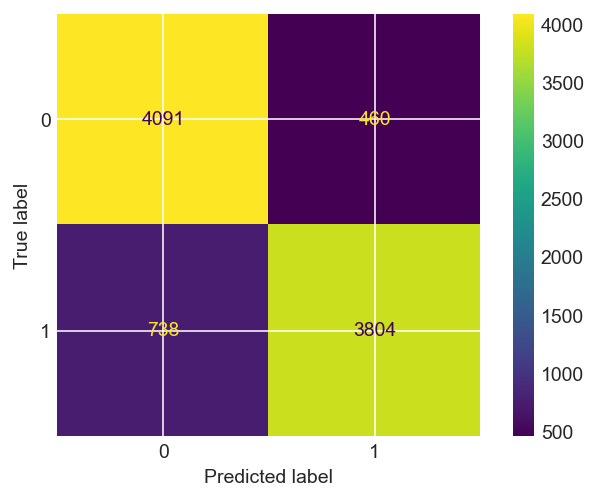

In [69]:
plot_confusion_matrix(rf,X_test, y_test)

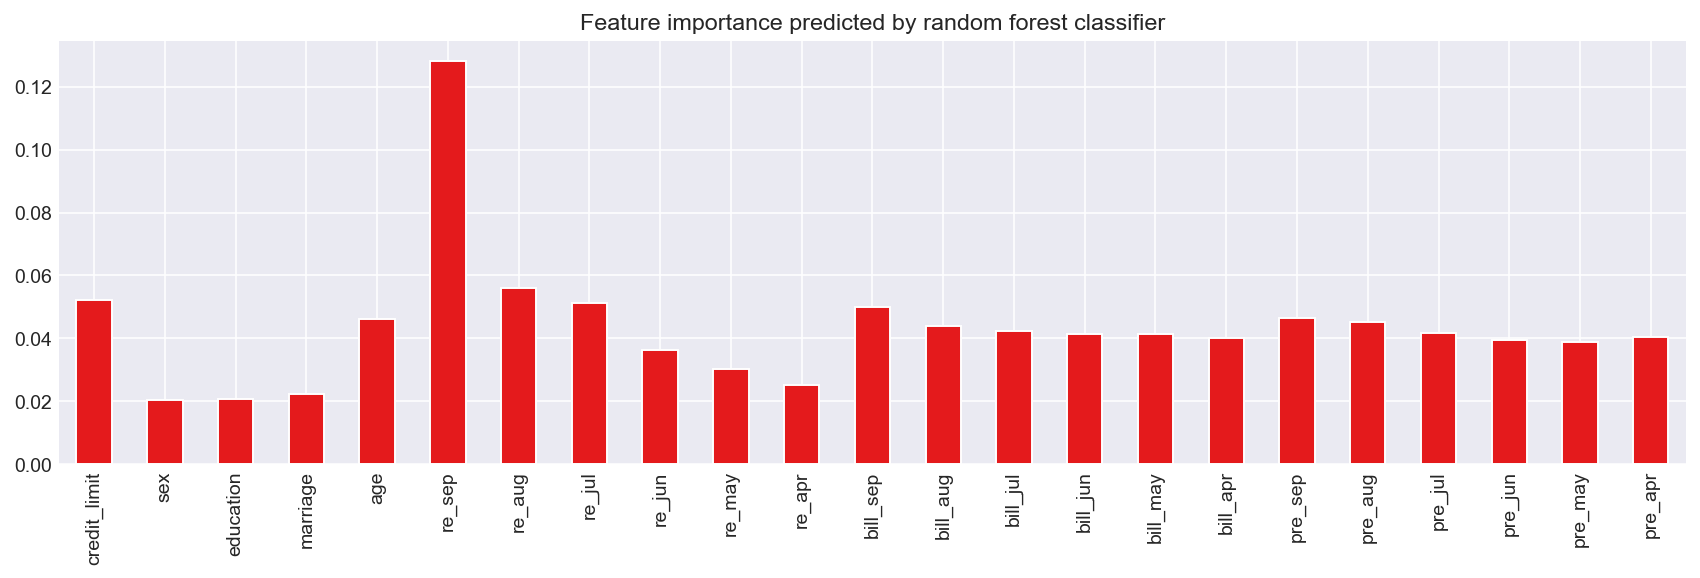

In [70]:
importance = pd.Series(rf.feature_importances_, index=features.columns.tolist())
importance.plot(kind='bar', figsize=(15,4))
plt.title("Feature importance predicted by random forest classifier");